# Chapter 4: Numerical Integration

MTH 264 Numerical Methods

Kittapat Ratanaphupha

## Riemann Sum
As we know that, Riemann sum is one of the approximation of integral by using finite sum. The form of Riemann sum is shown generally as,
$$S = \sum_{i=1}^n f(x_i^*)\Delta x_i,$$
where $\Delta x_i = x_i - x_{i-1}$ which $a = x_0 < x_1 < ... < x_n = b$ is approximating an integral, $\int_a^b f(x)\,dx$ and $x_i^* \in [x_{i-1},x_i]$. 

## Midpoint rule
For this case, we select $x^* = (x_i + x_{i-1})/2$. The formula for using the integration is,
$$S = \sum_{i=1}^n f\left(\frac{x_i-x_{i-1}}{2}\right)\cdot (x_i - x_{i-1}).$$

In [2]:
import numpy as np

def midpoint_rule(start, stop, function, gap, **kwargs):
    assert [type(float(gap)), type(float(start)), type(float(stop))] == [float, float, float], "These arguments must be numeric." 
    assert [type(float(function(start, **kwargs))), type(float(function(stop, **kwargs)))] == [float, float], "The function is not numeric."
    assert gap > 0, "Gap must be larger than 0."
    
    partition = np.arange(start, stop, gap if stop > start else -gap)
    partition = np.append(partition, stop)
    
    midpoint = (partition[1:] + partition[:-1]) / 2

    riemann_sum = np.sum(function(midpoint, **kwargs) * (partition[1:] - partition[:-1]))

    return riemann_sum

### Example function
For real implementation, we have a mandatory mission to create a numeric function, parabola in this case.

In [3]:
def parabola(x, a = 1, b = 2, c = 4):
    return a * x ** 2 + b * x + c

### Implementation and Error
The error in this approximator is up to degree 3 of gap $O([b-a]^3)$.

*Proof*. Consider only one-section integral approximator, the midpoint rule will give an error equals to,
$$E = \int_a^b f(x)\,dx - f\left(\frac{b+a}{2}\right)\cdot (b-a).$$
Since $f([b+a]/2)$ is constant, we can combine the second term into an integral like this,
$$= \int_a^b f(x) - f\left(\frac{b+a}{2}\right)\;dx$$
For this case, we will approximate $f(x)$ in second-order Taylor series with adding remainder term in second-order term that $c_x \in [a,b]$,
$$f(x) = f\left(\frac{a+b}{2}\right) + f'\left(\frac{a+b}{2}\right) (x - (b + a)/2) + \frac{f''(c_x)}{2} (x - (b + a)/2)^2.$$
Let $h := b-a$, the error therefore equals to,
$$E = \int_a^b f'\left(\frac{a+b}{2}\right) (x - (b + a)/2) + \frac{f''(c_x)}{2} (x - (b + a)/2)^2\,dx$$
$$= f'\left(\frac{a+b}{2}\right) \frac{((a-b)/2)^2-((b-a)/2)^2}{2}+\int_a^b \frac{f''(c_x)}{2} (x - (b + a)/2)^2\,dx $$
According to the first mean value theorem for definite integrals, the integral $\int_a^b f(x)g(x)\,dx$ can equal to $f(c)\int_a^b g(x)\,dx$ as $c\in [a,b]$. We are able to have more simplified form of error term as,
$$= \int_a^b \frac{f''(c_x)}{2} (x - (b + a)/2)^2\,dx$$
$$= \frac{f''(c)}{2}\int_a^b (x-(b+a)/2)^2\,dx$$
$$= \frac{f''(c)}{2}\frac{2((b-a)/2)^3}{3}$$
$$= \frac{h^3}{24}f''(c).\quad \square$$

In [4]:
midpoint_rule(1,10, parabola,0.01)

467.99992499999996

## Trapezoidal Rule
For this case, we are not going to select any $x^*$ but averaging a function on both sides as $(f(x_i) + f(x_{i-1}))/2$. The approximator will therefore equal to,
$$S = \sum_{i = 1}^n \frac{f(x_i) + f(x_{i - 1})}{2}\cdot (x_i - x_{i-1}).$$

In [5]:
def trapezoidal_rule(start, stop, function, gap, **kwargs):
    assert [type(float(gap)), type(float(start)), type(float(stop))] == [float, float, float], "These arguments must be numeric." 
    assert [type(float(function(start, **kwargs))), type(float(function(stop, **kwargs)))] == [float, float], "The function is not numeric."
    assert gap > 0, "Gap must be larger than 0."

    partition = np.arange(start, stop, gap if stop > start else -gap)
    partition = np.append(partition, stop)

    y_trapezoid = (function(partition[1:], **kwargs) + function(partition[:-1], **kwargs)) / 2

    integral = np.sum(y_trapezoid * (partition[1:] - partition[:-1]))

    return integral

### Implementation and error
The error magnitude in trapizoidal rule is doubled of midpoint rule at negative way.

*Proof*. Setting an error between integral and the approximator,
$$E = \int_a^b f(x)\,dx - \frac{f(a)+f(b)}{2}\cdot (b - a).$$
By using a benefit of symmetry, $\frac{a+b}{2} - a = b - \frac{b+a}{2} = \frac{b-a}{2}$, the error will convert in the form of integral:
$$= \int_a^b f(x)\,dx - \frac{b-a}{2}\cdot(f(a)+f(b))$$
$$= \int_a^b f(x)\,dx - \left[(b-\frac{a+b}{2})f(b) - (a-\frac{a+b}{2})f(a)\right]$$
$$= \int_a^b f(x)\,dx - \int_a^b(x - \frac{a+b}{2})\,df(x)$$
As integration by parts, we can resemble as the form of,
$$= -\int_a^b (x - \frac{a+b}{2})f'(x)\,dx.$$
This integral can use for analyzing an error as,
$$= -\frac{(b - \frac{a+b}{2})^2}{2} f'(b) - \frac{(a - \frac{a+b}{2})^2}{2} f'(a) - \frac{1}{2}\int_a^b (x - \frac{a+b}{2})^2 f''(x)\,dx$$
$$= -\frac{1}{2}(\frac{(b-a)^2}{4}(f'(b)-f'(a)) - \int_a^b (x - \frac{a+b}{2})^2 f''(x)\,dx)$$
$$= -\frac{1}{2}\int_a^b (\frac{(b-a)^2}{4}-(x - \frac{a+b}{2})^2) f''(a)\,dx.$$

Using mean value theorem, the second derivative will be factored as $f''(c)$ when $c \in [a,b]$,
$$= -\frac{f''(c)}{2}\int_a^b (\frac{(b-a)^2}{4}-(x - \frac{a+b}{2})^2)\,dx$$
$$= -\frac{f''(c)}{2} [\frac{(b-a)^3}{4} - \frac{(b-a)^3}{12}]$$
$$= -\frac{h^3}{12} f''(c)\quad\square$$

In [6]:
trapezoidal_rule(1,10, parabola, 0.01)

468.00014999999996

## Simpson's $\frac{1}{3}$-rule

The approximation is done by the following function,
$$S = \sum_{i=1}^n \frac{x_n - x_{n-1}}{6}[f(x_{n-1})+4f(\frac{x_i+x_{i-1}}{2})+f(x_i)].$$

The derivation comes from a basic assumption of function approximator that is in form of $f(x) = ax^2+bx+c$. Then, substitute a known value of function in each section and solve the linear systems.

In [7]:
def simpsons_13rule(start, stop, function, gap, **kwargs):
    assert [type(float(gap)), type(float(start)), type(float(stop))] == [float, float, float], "These arguments must be numeric." 
    assert [type(float(function(start, **kwargs))), type(float(function(stop, **kwargs)))] == [float, float], "The function is not numeric."
    assert gap > 0, "Gap must be larger than 0."

    partition = np.arange(start, stop, gap if stop > start else -gap)
    partition = np.append(partition, stop)

    b = partition[1:]
    a = partition[:-1]

    integral = np.sum((b - a)/6*(function(a,**kwargs) + 4 * function((a + b) / 2, **kwargs) + function(b, **kwargs)))

    return integral

### Implementation and error
The Simpson's $\frac{1}{3}$-rule has an error in order of $h^5$ or $E = -\frac{1}{2880}f^{(4)}(c)h^5$

In [8]:
simpsons_13rule(1,10, parabola,0.01)

468.0

## Comparison for each methods
As you acknowledge about the order of convergence, we give an exact error for each integration method as third and fifth power of $h$. In the visualization, there are 3 lines which are represented the error due to the integration in solid lines. Also, the other 3 lines are calculated error which may be a bit nonfit due to the assumption of equality in each gap on partition.

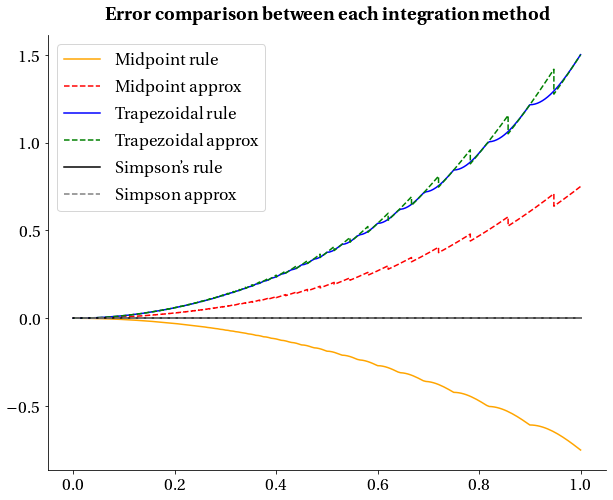

In [13]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=18)
matplotlib.rc('legend', fontsize=18)
matplotlib.rc('text.latex', preamble=r'\usepackage{fourier}')
plt.rcParams["font.family"] = "serif"

x_value = []
y1_value = []
y2_value = []
y3_value = []
for i in range(201):
    y1_value.append(midpoint_rule(1, 10, parabola, (1e-6 - 1)/200*i + 1) - 468)
    y2_value.append(trapezoidal_rule(1, 10, parabola, (1e-6 - 1)/200*i + 1) - 468)
    y3_value.append(abs(simpsons_13rule(1, 10, parabola, (1e-6 - 1)/200*i + 1) - 468))
    x_value.append((1e-6 - 1)/200*i + 1)

fig, ax = plt.subplots(figsize = (10,8))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

X = np.arange(1e-5,1,1e-5)
plt.plot(x_value, y1_value, label = "Midpoint rule", c = "orange")
plt.plot(X, X**3/24 * 2 * np.round((10-1)/X), label = "Midpoint approx", linestyle = "--", c = "red")
plt.plot(x_value, y2_value, label = "Trapezoidal rule", c = "blue")
plt.plot(X, X**3/12 * 2 * np.round((10-1)/X), label = "Trapezoidal approx", linestyle = "--", c = "green")
plt.plot(x_value, y3_value, label = "Simpson's rule", c = "black")
plt.plot(x_value, [0] * len(x_value), label = "Simpson approx", c = "grey", linestyle = "--")
plt.title(r"\textbf{Error comparison between each integration method}", fontsize = 20, family = "sans-serif", y = 1.02)
plt.legend()
plt.show()

## Summary
| Algorithm | Approach | Error convergence |
|---|---|---|
| Midpoint rule | set $x^*$ straightfully in Riemann sum as the middle point of section | $\frac{h^3}{24}\,f''(c)$ |
| Trapezoidal rule | set $(f(x_i) + f(x_{i-1}))/2$ instead of $f(x^*)$ in Riemann sum | $-\frac{h^3}{12}\,f''(c)$ |
| Simpson's 1/3-rule | using interpolation in parabola form and integral as usually | $-\frac{h^5}{2880}\,f^{(4)}(c)$ |